# Semantic Segmentation

In this notebook we will explore semantic segmentation using three different models from Hugging Face.

## 🛠️ Supported Hardware

This notebook can run in a CPU or in a GPU.

✅ AMD Instinct™ Accelerators  
✅ AMD Radeon™ RX/PRO Graphics Cards  
✅ AMD EPYC™ Processors  
✅ AMD Ryzen™ (AI) Processors  

Suggested hardware: **AI PC powered by AMD Ryzen™ AI Processors**

## ⚡ Recommended Software Environment

::::{tab-set}

:::{tab-item} Linux
- [Install Docker container](https://amdresearch.github.io/aup-ai-tutorials//env/env-gpu.html)
- [Install PyTorch](https://amdresearch.github.io/aup-ai-tutorials//env/env-cpu.html)
:::

:::{tab-item} Windows
- [Install Direct-ML](https://amdresearch.github.io/aup-ai-tutorials//env/env-gpu-windows.html)
- [Install PyTorch](https://amdresearch.github.io/aup-ai-tutorials//env/env-cpu.html)
:::
::::

## 🎯 Goals

- Show you how to download a model from HuggingFace
- Run semantic segmentation on an AMD platform
- Explore different segmentation models

:::{seealso}
[Hugging Face Semantic Segmentation](https://huggingface.co/docs/transformers/en/tasks/semantic_segmentation)
:::

## 🚀 Run semantic segmentation on an AMD Platform

Import necessary packages

In [1]:
from transformers import pipeline
from PIL import Image
import requests
import torch
import matplotlib.pyplot as plt

Use GPU if available

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'{device=}')

device=device(type='cuda')


Download and show a sample image

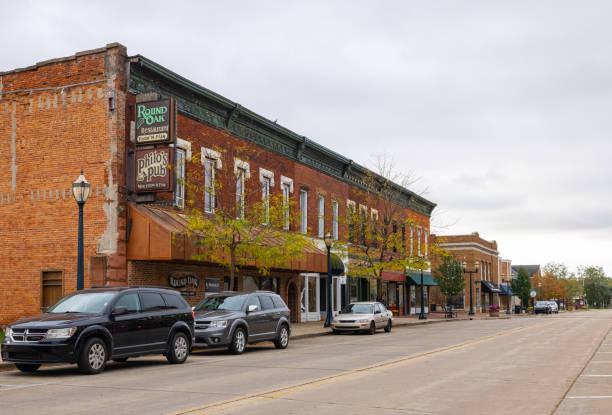

In [3]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/segmentation_input.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

Define function to plot images side by side, we will use this function to plot the original image next to the segmented image

In [4]:
def plot_images(image, results):
    _, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].imshow(image)
    axes[0].axis('off')
    axes[0].set_title('Original')
    
    masked = Image.composite(image, Image.new('RGB', image.size, (0, 0, 0)), results)

    axes[1].imshow(masked)
    axes[1].axis('off')
    axes[1].set_title('Segmented')
    
    plt.show()

## Run Semantic Segmentation using Hugging Face API

In the next cells, we are going to download three different models using transformers.pipeline in `image-segmentation` mode. As you will see, the other parameters are the model name and the device.
Once the model is downloaded, we can run the inference in the sample image and plot the original and segmented image.

First, we will try the [`nvidia/segformer-b1-finetuned-cityscapes-1024-1024`](https://huggingface.co/nvidia/segformer-b1-finetuned-cityscapes-1024-1024) model from Hugging Face. 

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda


[{'score': None, 'label': 'road', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC2A7946C30>}, {'score': None, 'label': 'sidewalk', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC619F48D40>}, {'score': None, 'label': 'building', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC2A54F8710>}, {'score': None, 'label': 'wall', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC2A54FB470>}, {'score': None, 'label': 'pole', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC2A54FBDD0>}, {'score': None, 'label': 'traffic sign', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC2A54F8BC0>}, {'score': None, 'label': 'vegetation', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC2A54FA990>}, {'score': None, 'label': 'terrain', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC2A54F8FE0>}, {'score': None, 'label': 'sky', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC2A54F9400>}, {'score': None, 'label': 'car'

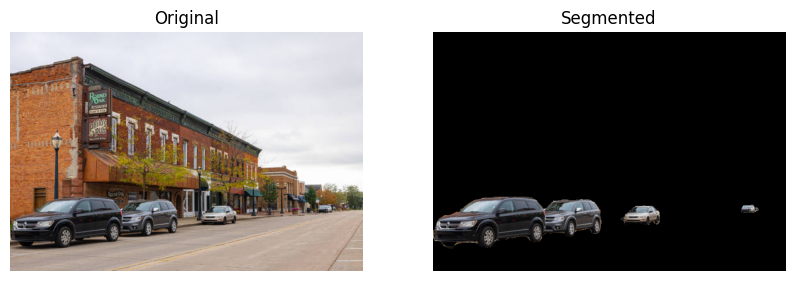

In [5]:
semantic_segmentation = pipeline("image-segmentation", "nvidia/segformer-b1-finetuned-cityscapes-1024-1024", device=device)
results = semantic_segmentation(image)
print(results)
plot_images(image, results[-1]["mask"])

In [6]:
print(f'Semantic segmentation model size: {semantic_segmentation.model.num_parameters() * semantic_segmentation.model.dtype.itemsize / 1024 / 1024:.2f} MB')

Semantic segmentation model size: 52.19 MB


Now, let's try the [`facebook/mask2former-swin-large-cityscapes-instance`](https://huggingface.co/facebook/mask2former-swin-large-cityscapes-semantic) model from Hugging Face.

config.json:   0%|          | 0.00/76.9k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/866M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

/opt/conda/envs/py_3.12/lib/python3.12/site-packages/transformers/utils/deprecation.py:172: UserWarning: The following named arguments are not valid for `Mask2FormerImageProcessor.__init__` and were ignored: '_max_size'
  return func(*args, **kwargs)
Device set to use cuda
`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.999944, 'label': 'car', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC2A55AB470>}, {'score': 0.999945, 'label': 'car', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC2A77CE120>}, {'score': 0.999652, 'label': 'car', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC2A77CE0C0>}, {'score': 0.903529, 'label': 'person', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC29FF21700>}]


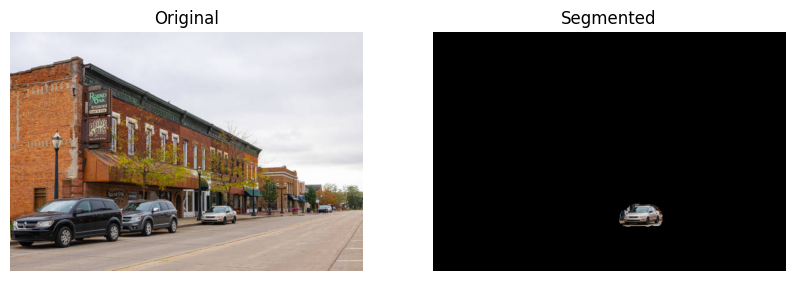

In [7]:
instance_segmentation = pipeline("image-segmentation", "facebook/mask2former-swin-large-cityscapes-instance", device=device)
results = instance_segmentation(image)
print(results)
plot_images(image, results[2]["mask"])

In [8]:
print(f'Instance segmentation model size: {instance_segmentation.model.num_parameters() * instance_segmentation.model.dtype.itemsize / 1024 / 1024:.2f} MB')

Instance segmentation model size: 822.08 MB


Now, let's try the [`facebook/mask2former-swin-large-cityscapes-panoptic`](https://huggingface.co/facebook/mask2former-swin-large-cityscapes-panoptic) model from Hugging Face.

config.json:   0%|          | 0.00/77.3k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/866M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Device set to use cuda
`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.999981, 'label': 'car', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC29FF3B2C0>}, {'score': 0.999958, 'label': 'car', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC29FF3B770>}, {'score': 0.99997, 'label': 'vegetation', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC29FF383E0>}, {'score': 0.999575, 'label': 'pole', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC29FF21F70>}, {'score': 0.999958, 'label': 'building', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC29FF20260>}, {'score': 0.999634, 'label': 'road', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC29FF22510>}, {'score': 0.996092, 'label': 'sidewalk', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC29F0662A0>}, {'score': 0.999221, 'label': 'car', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC29F1B50A0>}, {'score': 0.99987, 'label': 'sky', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x7FC29F1B4EC0>}]


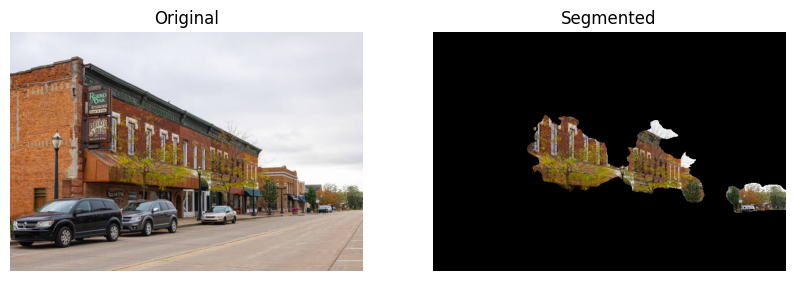

In [9]:
panoptic_segmentation = pipeline("image-segmentation", "facebook/mask2former-swin-large-cityscapes-panoptic", device=device)
results = panoptic_segmentation(image)
print(results)
plot_images(image, results[2]["mask"])

In [10]:
print(f'Panoptic model size: {panoptic_segmentation.model.num_parameters() * panoptic_segmentation.model.dtype.itemsize / 1024 / 1024:.2f} MB')

Panoptic model size: 822.09 MB


----------
Copyright (C) 2025 Advanced Micro Devices, Inc. All rights reserved.

SPDX-License-Identifier: MIT